In [60]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [61]:
colNames = ['C/A',
            'UNIT', 
            'SCP', 
            'STATION', 
            'LINENAME', 
            'DIVISION', 
            'DATE', 
            'TIME', 
            'DESc',
            'ENTRIES',
            'EXITS'
            ]

In [62]:
"""
# get today's date
#base = dt.datetime(2018,6,30).date()
base = dt.datetime.today()
# want 3 months of data (3 * 31)
numdays = int(3 * 31)
date_list = [base - dt.timedelta(days=x) for x in range(numdays)]
# get all of the Saturday dates
isSat = [ x.weekday() == 5 for x in date_list]
allSats = np.array(date_list)[isSat]
# create the strings for the years, months, and days
years = [ x.year for x in allSats]
years = [str(x)[2:] for x in  years]
months = [ x.month for x in allSats]
months = [ str(x) if len(str(x)) != 1 else '0' + str(x) for x in months ]
days = [ x.day for x in allSats]
days = [ str(x) if len(str(x)) != 1 else '0' + str(x) for x in days ]
# create a list of the dates needed
datesNeeded = [ x + y + z for x,y,z in zip(years, months, days)]
# create a list of the urls that we need to query
urls = [ 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + x + '.txt' for x in datesNeeded]
# function to query the url and return a pandas dataframe
def getData(a_url):
    out = pd.read_csv(a_url, header=0, names = colNames)
    return out
# loop through all the urls to get the dataframes
dataDf = []
for url in urls:
    print("Getting data for {} of {}".format(urls.index(url)+1,len(url)))
    dataDf.append(getData(url))
    print("Done!")
# combine the dataframes into 1
dataDf = pd.concat(dataDf, ignore_index=True)
# save the data as a pickle files, in case we want to load it later
# ----- WARNING: this creates close to a 4GB file. it will take a minute or two to finish ---------
dataDf.to_pickle('dataDf.pkl')
#dataDf.to_pickle('dataDf2018.pkl')
# this is how you you would load the data from the pickle file
#dataDf = pd.read_pickle('dataDf.pkl')
"""

'\n# get today\'s date\n#base = dt.datetime(2018,6,30).date()\nbase = dt.datetime.today()\n# want 3 months of data (3 * 31)\nnumdays = int(3 * 31)\ndate_list = [base - dt.timedelta(days=x) for x in range(numdays)]\n# get all of the Saturday dates\nisSat = [ x.weekday() == 5 for x in date_list]\nallSats = np.array(date_list)[isSat]\n# create the strings for the years, months, and days\nyears = [ x.year for x in allSats]\nyears = [str(x)[2:] for x in  years]\nmonths = [ x.month for x in allSats]\nmonths = [ str(x) if len(str(x)) != 1 else \'0\' + str(x) for x in months ]\ndays = [ x.day for x in allSats]\ndays = [ str(x) if len(str(x)) != 1 else \'0\' + str(x) for x in days ]\n# create a list of the dates needed\ndatesNeeded = [ x + y + z for x,y,z in zip(years, months, days)]\n# create a list of the urls that we need to query\nurls = [ \'http://web.mta.info/developers/data/nyct/turnstile/turnstile_\' + x + \'.txt\' for x in datesNeeded]\n# function to query the url and return a pandas d

In [63]:
#dataDf = pd.read_pickle('dataDf.pkl')
dataDf = pd.read_pickle('dataDf2018.pkl')
#dataDf

In [64]:
# looking at the shape of the data
dataDf.shape

(2757497, 11)

In [65]:
# creating a new column for Unique Station
dataDf['UNIQUE_STATION'] = dataDf['STATION'] + '-' + dataDf['LINENAME'] + '-' + dataDf['DIVISION']

In [66]:
# concatenating the strings of Date and Time into a new Datetime column
dataDf['DATETIME'] = dataDf['DATE'] + ' ' + dataDf['TIME']

In [67]:
# turning the strings in the Datetime column into dt.Datetime objects
dataDf['DATETIME'] = pd.to_datetime(dataDf['DATETIME'])
#dataDf

In [68]:
# sorting the data by the datetime
dataDf = dataDf.sort_values(['DATETIME']) 
#dataDf

In [69]:
# getting the Exits totals for each turnstile, for each time entry
turnStileExitSums = dataDf.groupby(['C/A','UNIT','SCP','UNIQUE_STATION','DATETIME']).sum()['EXITS']
#turnStileExitSums

In [70]:
# taking the difference in the totals, in order to get the actual number of exits for the turnstile
turnStileExitSumsDiff = turnStileExitSums.diff()
#turnStileExitSumsDiff

In [71]:
# flattening the dataframe 
turnStileExitSumsDiff = turnStileExitSumsDiff.reset_index()
#turnStileExitSumsDiff

In [72]:
# checking to see if there are any values for Exits that are negative
turnStileExitSumsDiff[turnStileExitSumsDiff['EXITS'] < 0]

,C/A,UNIT,SCP,UNIQUE_STATION,DATETIME,EXITS
587,A002,R051,02-00-01,59 ST-NQR456W-BMT,2018-03-24 00:00:00,-947797.0
1761,A002,R051,02-03-01,59 ST-NQR456W-BMT,2018-03-24 00:00:00,-3103171.0
2935,A002,R051,02-03-03,59 ST-NQR456W-BMT,2018-03-24 00:00:00,-1709109.0
3522,A002,R051,02-03-04,59 ST-NQR456W-BMT,2018-03-24 00:00:00,-2797492.0
4109,A002,R051,02-03-05,59 ST-NQR456W-BMT,2018-03-24 00:00:00,-2201075.0
...,...,...,...,...,...,...
2752806,S102,R165,00-05-01,TOMPKINSVILLE-1-SRT,2018-03-24 02:00:00,-65536.0
2753985,TRAM1,R468,00-00-01,RIT-MANHATTAN-R-RIT,2018-03-24 01:00:00,-1778.0
2755135,TRAM2,R469,00-00-00,RIT-ROOSEVELT-R-RIT,2018-03-24 01:00:00,-5889.0
2755760,TRAM2,R469,00-00-01,RIT-ROOSEVELT-R-RIT,2018-03-29 13:00:00,-357126.0


In [73]:
# converting all the negative values for exits into positive values
turnStileExitSumsDiff['EXITS'] = turnStileExitSumsDiff['EXITS'].abs()
#turnStileExitSumsDiff

In [74]:
# check to see if there are any remaining negative values (there should be zero)
turnStileExitSumsDiff[turnStileExitSumsDiff['EXITS'] < 0]

,C/A,UNIT,SCP,UNIQUE_STATION,DATETIME,EXITS


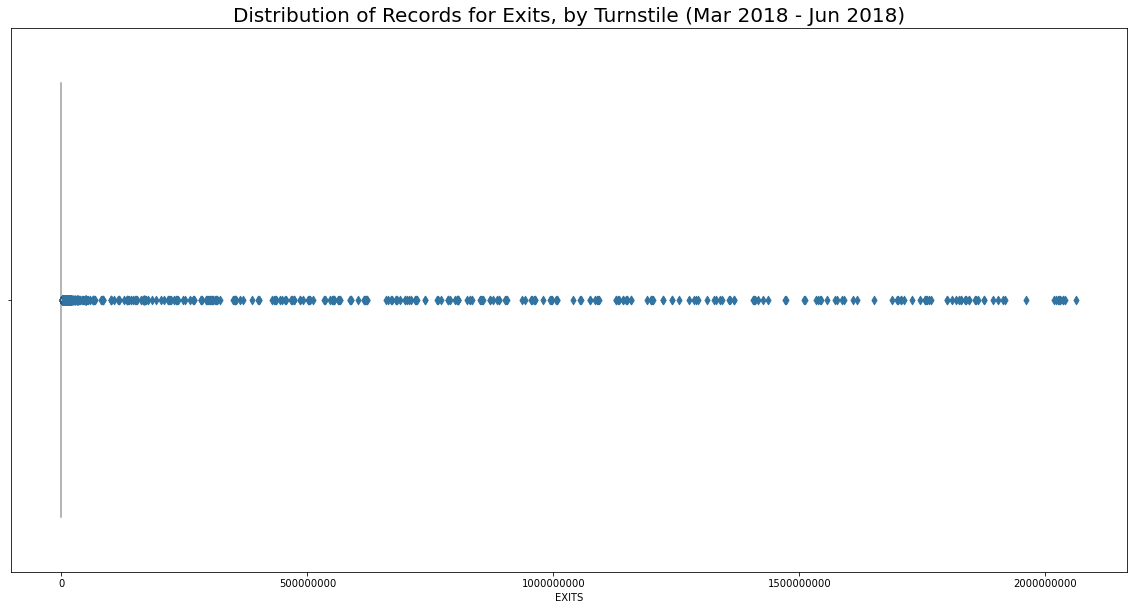

In [75]:
# plot a distribution plot for the frequency of Exits records
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(x='EXITS', data=turnStileExitSumsDiff)
plt.title("Distribution of Records for Exits, by Turnstile (Mar 2018 - Jun 2018)", fontsize=20);

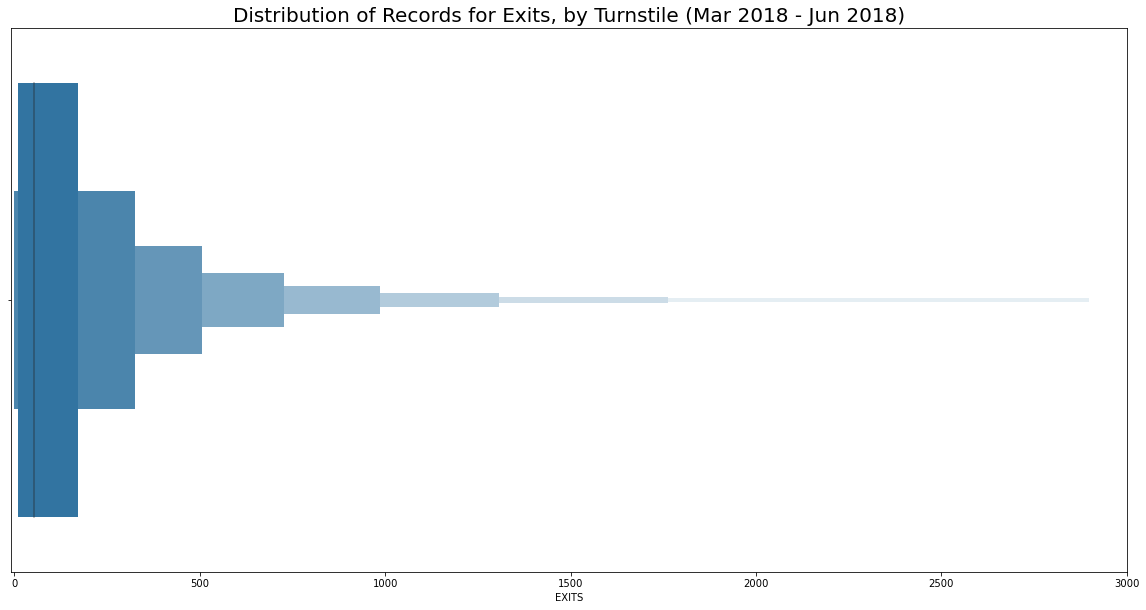

In [76]:
# make the x-axis smaller so we can see the distribution better
plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(x='EXITS', data=turnStileExitSumsDiff)
g.set(xlim=(-10, 3000))
plt.title("Distribution of Records for Exits, by Turnstile (Mar 2018 - Jun 2018)", fontsize=20);

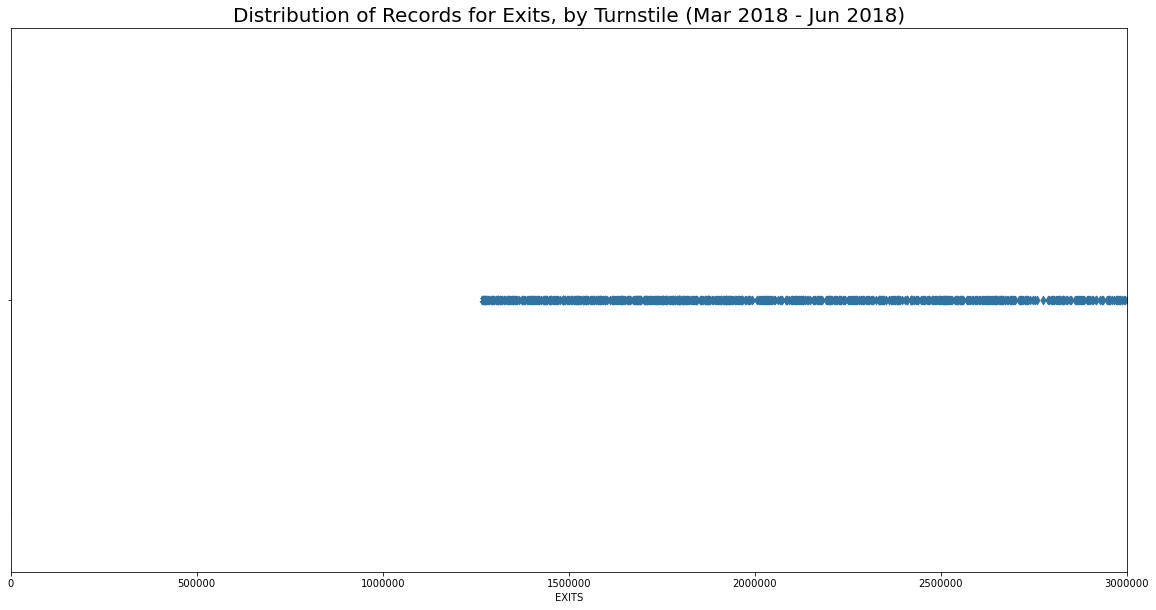

In [77]:
# finding out where the first outlier of the data starts
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(turnStileExitSumsDiff['EXITS'])
g.set(xlim=(-10, 3000000))
plt.title("Distribution of Records for Exits, by Turnstile (Mar 2018 - Jun 2018)", fontsize=20);

plt.figure(figsize=(20,10))
#plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(turnStileExitSumsDiff['EXITS'])
g.set(xlim=(-10, 35000))

In [78]:
# creating a new column called Time, which will be a string
turnStileExitSumsDiff['TIME'] = turnStileExitSumsDiff['DATETIME'].dt.time
turnStileExitSumsDiff['TIME'] = [ str(y) for x, y in turnStileExitSumsDiff['TIME'].iteritems()]
#turnStileExitSumsDiff

In [79]:
# get a count for how many times each Time appears in the data...
turnStileExitSumsDiff.groupby(['TIME']).count()['EXITS'].sort_values(ascending=False)

TIME
00:00:00    238218
04:00:00    238190
20:00:00    238167
08:00:00    238136
16:00:00    238118
             ...  
11:56:53         1
11:57:03         1
11:57:13         1
11:57:14         1
11:58:31         1
Name: EXITS, Length: 61009, dtype: int64

In [80]:
# ... and print out the top 30
turnStileExitSumsDiff.groupby(['TIME']).count()['EXITS'].sort_values(ascending=False)[:30]

TIME
00:00:00    238218
04:00:00    238190
20:00:00    238167
08:00:00    238136
16:00:00    238118
12:00:00    237962
01:00:00    169225
05:00:00    169216
21:00:00    169107
17:00:00    169077
09:00:00    169069
13:00:00    169051
22:00:00     10774
18:00:00     10773
02:00:00     10771
10:00:00     10770
14:00:00     10758
06:00:00     10745
11:00:00      3823
23:00:00      3823
15:00:00      3821
03:00:00      3820
19:00:00      3818
07:00:00      3807
00:22:00      3629
08:22:00      3625
20:22:00      3625
12:22:00      3622
16:22:00      3613
04:22:00      3612
Name: EXITS, dtype: int64

In [81]:
# based on the distribution plot of the data above, we are going to filter out records with more than 2000 exits
workingData = turnStileExitSumsDiff[turnStileExitSumsDiff['EXITS'] < 3000].copy()
#workingData

In [82]:
# comparing the lengths of the unfiltered data, with the length of the filtered data
print("The original data length was {}".format(len(turnStileExitSumsDiff)))
print("The filtered data length is {}".format(len(workingData)))
print("The filtered data contains {} percent of the original data".format(len(workingData)/len(turnStileExitSumsDiff)))

The original data length was 2757492
The filtered data length is 2752182
The filtered data contains 0.9980743371150306 percent of the original data


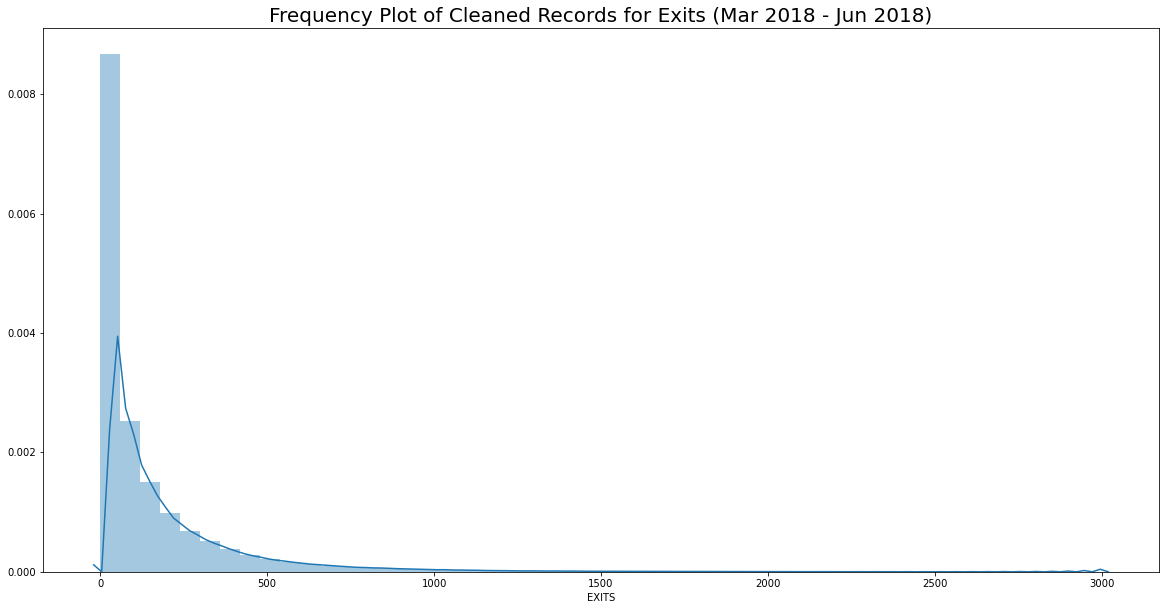

In [83]:
# here is a frequency plot of the records for Exits, for the filtered data
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')
g = sns.distplot(workingData['EXITS'])
plt.title("Frequency Plot of Cleaned Records for Exits (Mar 2018 - Jun 2018)", fontsize=20);

In [84]:
# show the data point that apppears the most
print("the mode is {}".format(workingData['EXITS'].mode().values[0]))
modeCount = workingData[ workingData['EXITS'] == 0 ]['EXITS'].count()
print("the count of mode is {}".format(modeCount))

the mode is 0.0
the count of mode is 397189


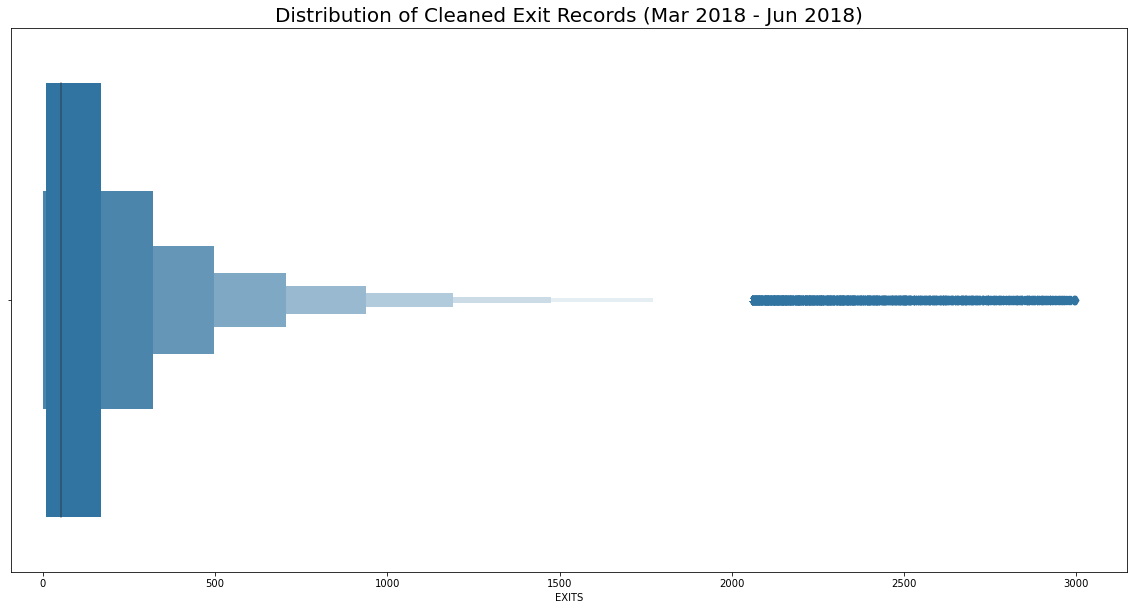

In [85]:
# plot the distribution of the filtered data
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(workingData['EXITS'])
plt.title("Distribution of Cleaned Exit Records (Mar 2018 - Jun 2018)", fontsize=20);

In [86]:
workingData

,C/A,UNIT,SCP,UNIQUE_STATION,DATETIME,EXITS,TIME
1,A002,R051,02-00-00,59 ST-NQR456W-BMT,2018-03-24 04:00:00,0.0,04:00:00
2,A002,R051,02-00-00,59 ST-NQR456W-BMT,2018-03-24 08:00:00,0.0,08:00:00
3,A002,R051,02-00-00,59 ST-NQR456W-BMT,2018-03-24 12:00:00,1.0,12:00:00
4,A002,R051,02-00-00,59 ST-NQR456W-BMT,2018-03-24 16:00:00,4.0,16:00:00
5,A002,R051,02-00-00,59 ST-NQR456W-BMT,2018-03-24 20:00:00,3.0,20:00:00
...,...,...,...,...,...,...,...
2757487,TRAM2,R469,00-03-01,RIT-ROOSEVELT-R-RIT,2018-06-29 05:00:00,1.0,05:00:00
2757488,TRAM2,R469,00-03-01,RIT-ROOSEVELT-R-RIT,2018-06-29 09:00:00,5.0,09:00:00
2757489,TRAM2,R469,00-03-01,RIT-ROOSEVELT-R-RIT,2018-06-29 13:00:00,4.0,13:00:00
2757490,TRAM2,R469,00-03-01,RIT-ROOSEVELT-R-RIT,2018-06-29 17:00:00,6.0,17:00:00


In [87]:
# create a new column for Week, which will be an integer that represents a specific week
workingData['WEEK'] = workingData['DATETIME'].dt.isocalendar().week.values
#workingData

In [88]:
# create a new column for Day of Week, which will be an integer value representing the weekday
workingData['DAYOFWEEK'] = workingData['DATETIME'].dt.dayofweek.values
#workingData

In [89]:
# Creating a new column, called TimeBlock that represents the block of time a record will be counted towards
startTimes = ['00:00', '04:00', '08:00', '12:00', '14:00', '18:00', '22:00']
endTimes = ['03:59:59', '07:59:59', '11:59:59', '13:59:59', '17:59:59', '21:59:59', '23:59:59', ]
tempDfList = []
#labels = list(startTimes[1:])
#labels.append(startTimes[0]) 

#for sT, eT, lbl in zip(startTimes, endTimes, labels):
for sT, eT in zip(startTimes, endTimes):
    #print(sT, eT)
    tempDf = workingData.set_index(['DATETIME']).between_time(sT,eT).reset_index()
    tempDf['TIMEBUCKET'] = eT
    tempDfList.append(tempDf)

tempDfList = pd.concat(tempDfList, ignore_index=True)

In [90]:
# creating the dataframe from the above dataframe, and deleting the temporary dataframe
workingDataBy4hrs = tempDfList
del tempDfList
#workingDataBy4hrs

In [91]:
#workingDataBy4hrs[ workingDataBy4hrs['TIMEBUCKET'] == '03:59:59']

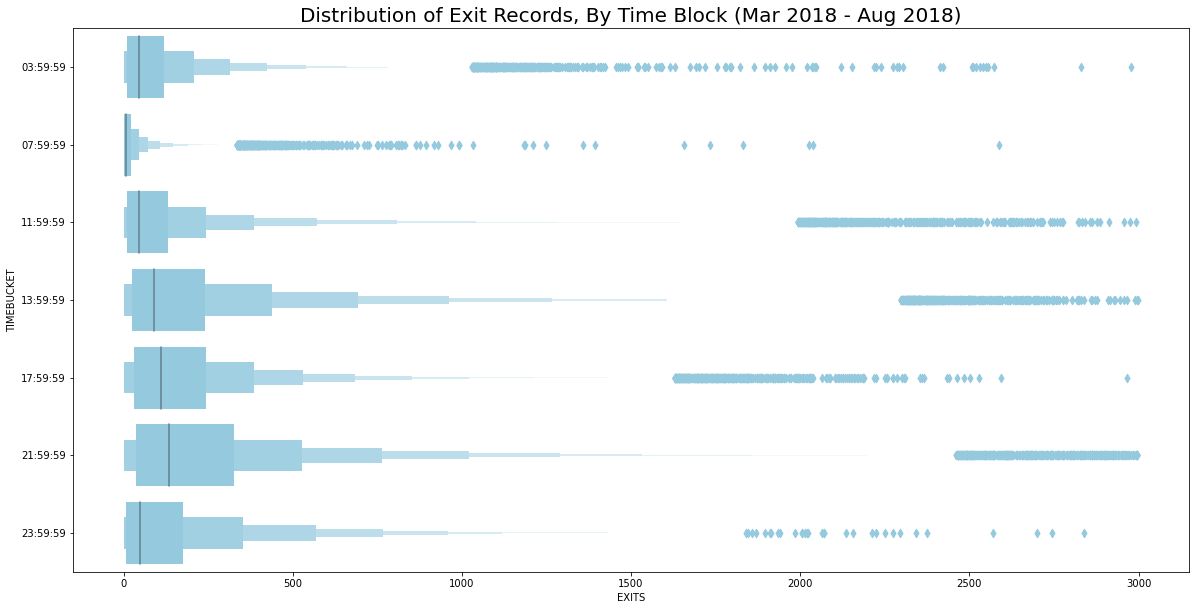

In [92]:
# plot the distribution of Records for Exit, by TimeBucket
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(y='TIMEBUCKET', x='EXITS',data=workingDataBy4hrs, color="skyblue")
plt.title("Distribution of Exit Records, By Time Block (Mar 2018 - Aug 2018)", fontsize=20);

In [93]:
# get the sum of all the Exits for the Records, by each TimeBucket
timebucketTotals = workingDataBy4hrs.groupby(['TIMEBUCKET']).sum()['EXITS'].reset_index()
#timebucketTotals

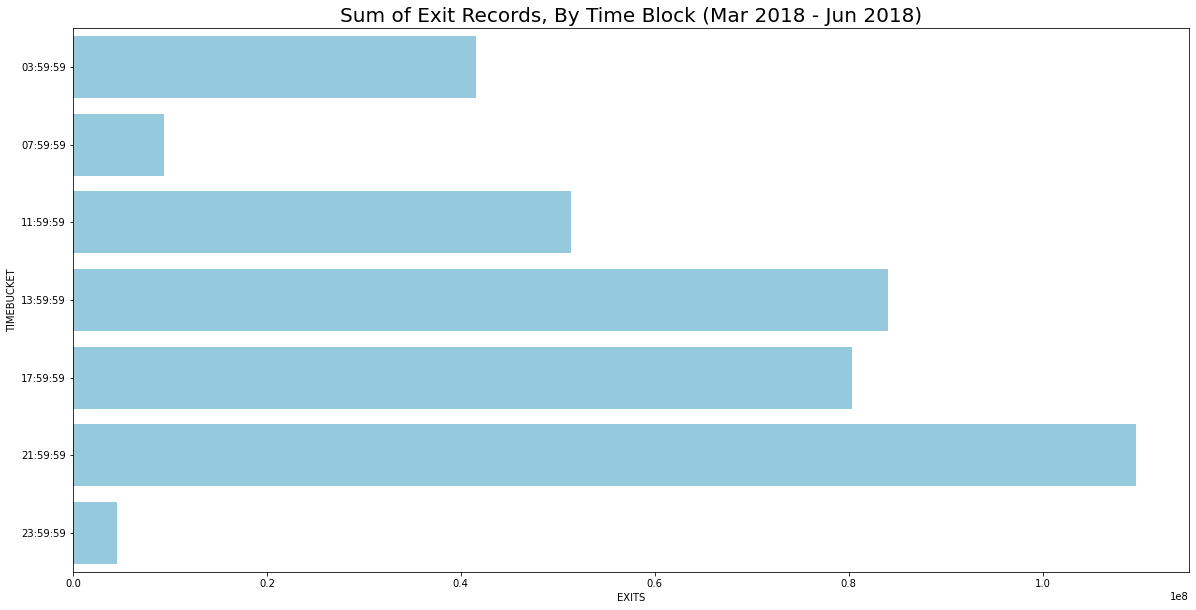

In [94]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='TIMEBUCKET', x='EXITS', data=timebucketTotals, color='skyblue')
plt.title("Sum of Exit Records, By Time Block (Mar 2018 - Jun 2018)", fontsize=20);

In [95]:
"""
plt.figure(figsize=(20,80))
plt.ticklabel_format(style='plain', axis='x')
g = sns.boxenplot(y='UNIQUE_STATION', x='EXITS',data=workingDataBy4hrs, color="skyblue")
#g.set(xlim=(-10, 1000))
plt.title("Distribution of Exit Records, By Station", fontsize=20);
"""

'\nplt.figure(figsize=(20,80))\nplt.ticklabel_format(style=\'plain\', axis=\'x\')\ng = sns.boxenplot(y=\'UNIQUE_STATION\', x=\'EXITS\',data=workingDataBy4hrs, color="skyblue")\n#g.set(xlim=(-10, 1000))\nplt.title("Distribution of Exit Records, By Station", fontsize=20);\n'

In [96]:
# Getting the sum of Exit records for each Station, by Week
dataByStation = workingDataBy4hrs.groupby(['UNIQUE_STATION', 'WEEK']).sum().reset_index()
dataByStation
# removing the first week (because the data looks strange with it)
dataByStation = dataByStation[dataByStation['WEEK']>dataByStation['WEEK'].min()]

In [97]:
weeklyMeans = dataByStation.groupby(['WEEK']).mean()['EXITS'].reset_index()
weeklyMeans

,WEEK,EXITS
0,13,56078.933054
1,14,53997.979079
2,15,57555.476987
3,16,57842.813417
4,17,57968.325678
5,18,58829.273486
6,19,57809.544885
7,20,57719.110647
8,21,56342.945720
9,22,52281.995825


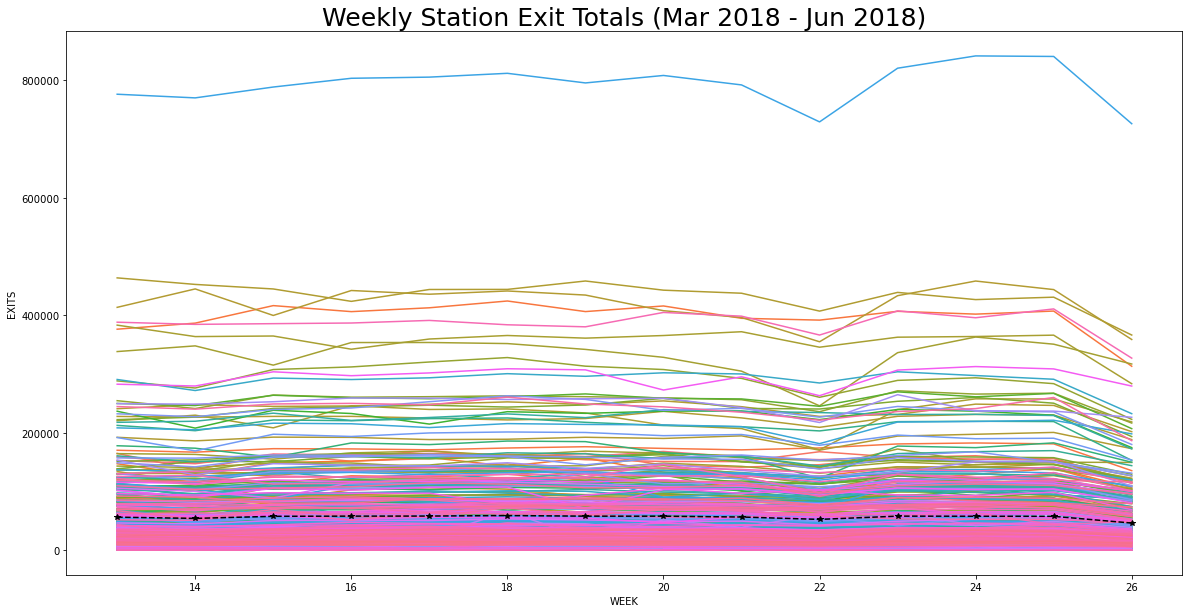

In [98]:
# plotting the sum of Exits, by Week, for each Station
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
g = sns.lineplot(x="WEEK", y="EXITS", hue="UNIQUE_STATION", data=dataByStation)
g.get_legend().remove()
plt.plot(weeklyMeans["WEEK"], weeklyMeans["EXITS"], 'k*--')
plt.title("Weekly Station Exit Totals (Mar 2018 - Jun 2018)", fontsize=25);

In [99]:
stationExitSum = workingDataBy4hrs.groupby(['UNIQUE_STATION']).sum()['EXITS'].sort_values(ascending=False).reset_index()
#stationExitSum

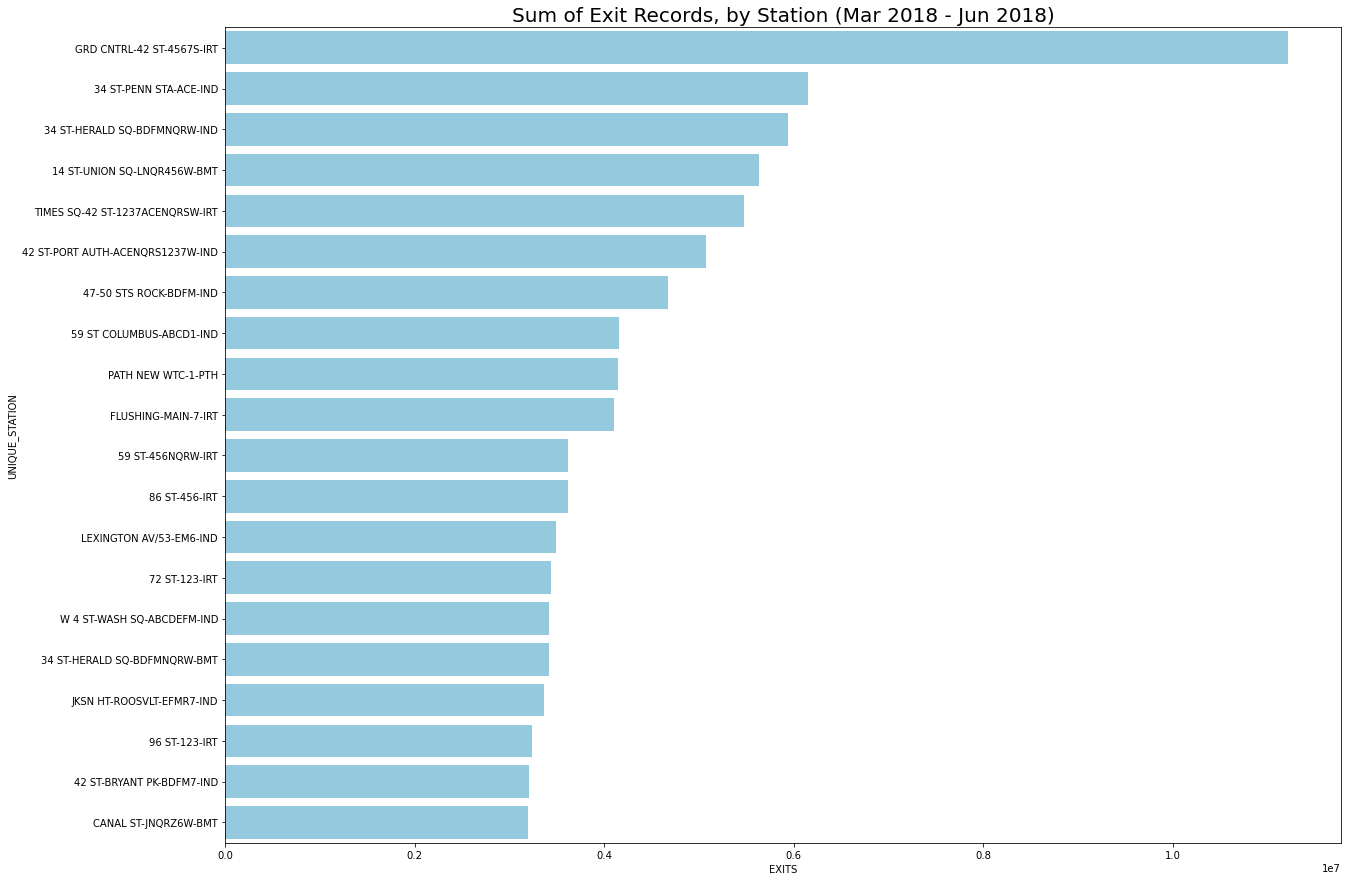

In [100]:
# plotting the sum of the Exit Records, for each Station
plt.figure(figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='UNIQUE_STATION', x='EXITS', data=stationExitSum[0:20], color='skyblue')
plt.title("Sum of Exit Records, by Station (Mar 2018 - Jun 2018)", fontsize=20);

In [101]:
# getting the median of the Exit Records, for each Station
stationExitMedian = workingDataBy4hrs.groupby(['UNIQUE_STATION']).median()['EXITS'].sort_values(ascending=False).reset_index()
#stationExitMedian

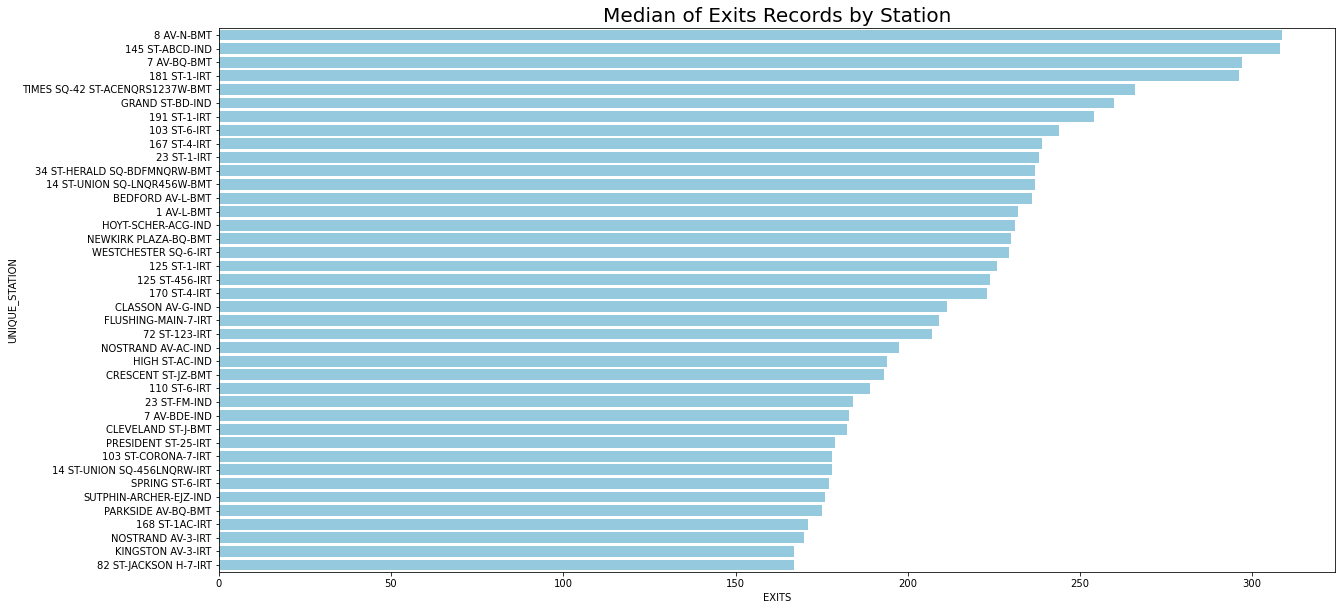

In [102]:
# plotting the median of the Exit Records, for each Station
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='UNIQUE_STATION', x='EXITS', data=stationExitMedian[0:40], color='skyblue')
plt.title("Median of Exits Records by Station", fontsize=20);

In [103]:
# getting the average of Exit Records, by station
stationExitMean = workingDataBy4hrs.groupby(['UNIQUE_STATION']).mean()['EXITS'].sort_values(ascending=False).reset_index()
#stationExitMean

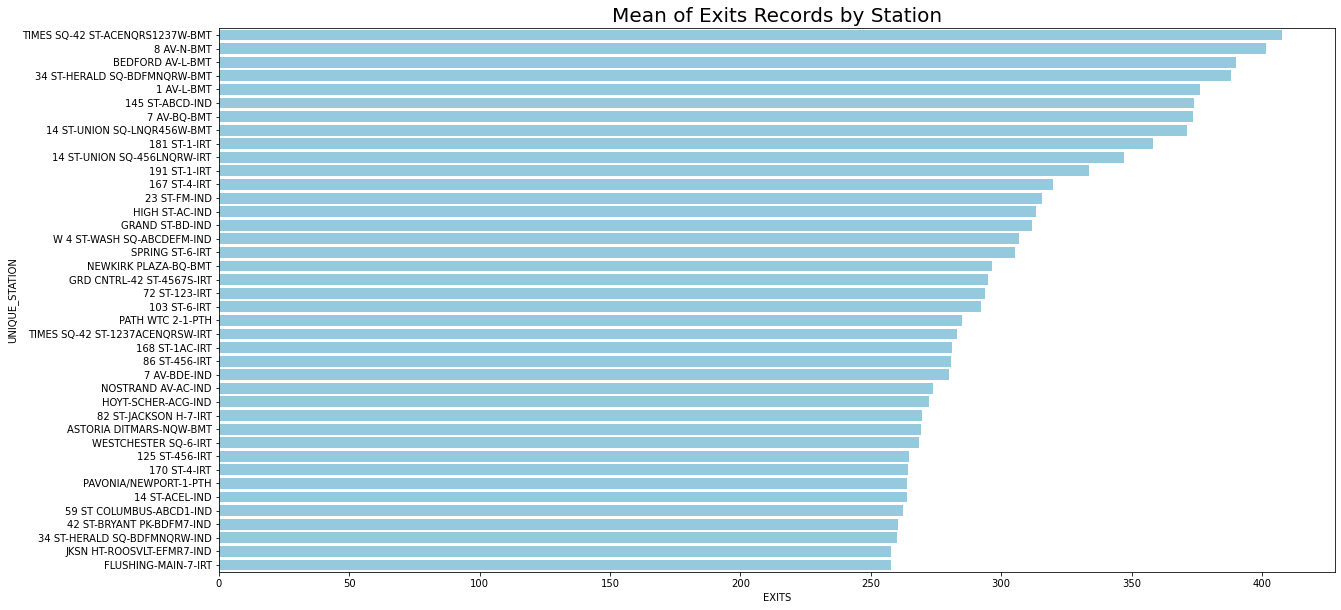

In [104]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='UNIQUE_STATION', x='EXITS', data=stationExitMean[0:40], color='skyblue')
plt.title("Mean of Exits Records by Station", fontsize=20);

In [105]:
# getting the max Exit Record, by Station
stationExitMax = workingDataBy4hrs.groupby(['UNIQUE_STATION']).max()['EXITS'].sort_values(ascending=False).reset_index()
#stationExitMax

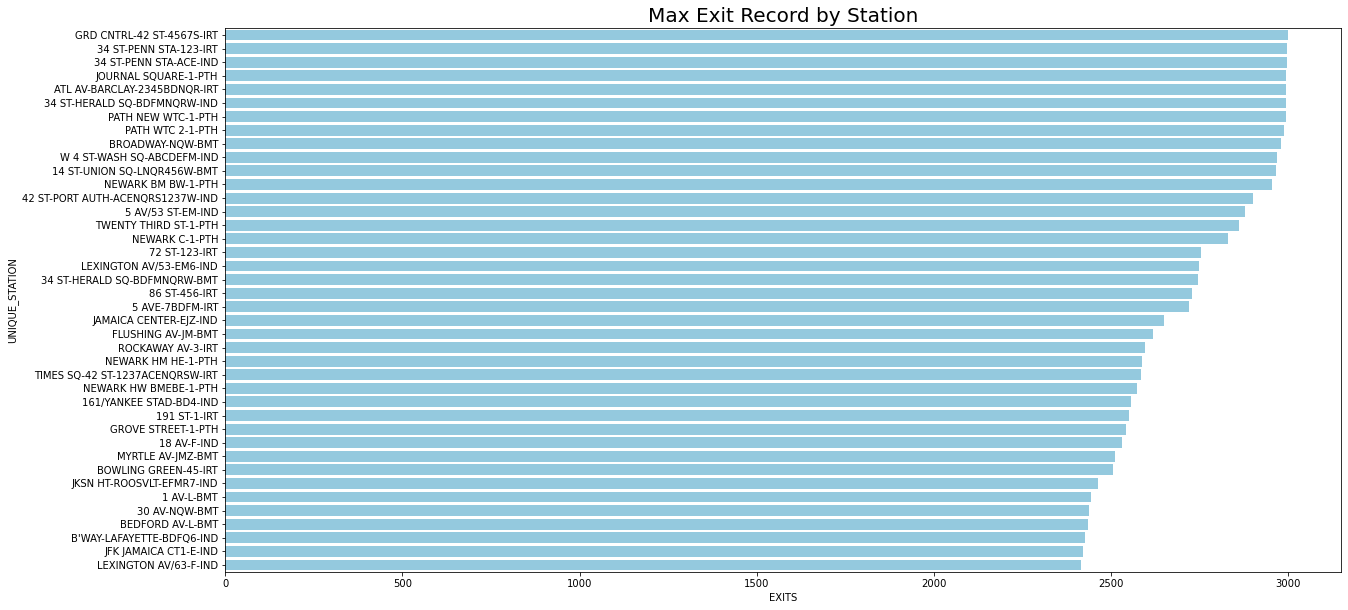

In [106]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='UNIQUE_STATION', x='EXITS', data=stationExitMax[0:40], color='skyblue')
plt.title("Max Exit Record by Station", fontsize=20);

In [107]:
# subsetting the filtered data for the 6pm - 10pm TimeBlock
workingData225959 = workingDataBy4hrs[ workingDataBy4hrs['TIMEBUCKET'] == '21:59:59' ].copy()
#workingData225959

In [108]:
# making sure we have data with only the wanted TimeBlock
workingData225959['TIMEBUCKET'].unique()

array(['21:59:59'], dtype=object)

In [109]:
# getting the max Exit record, by station
stationExitMax2 = workingData225959.groupby(['UNIQUE_STATION']).max()['EXITS'].sort_values(ascending=False).reset_index()
#stationExitMax2

In [110]:
# getting the median Exit record, by station
stationExitMedian2 = workingData225959.groupby(['UNIQUE_STATION']).median()['EXITS'].sort_values(ascending=False).reset_index()
#stationExitMedian2

In [111]:
# getting the average Exit record, by station
stationExitMean2 = workingData225959.groupby(['UNIQUE_STATION']).mean()['EXITS'].sort_values(ascending=False).reset_index()
#stationExitMean2

In [112]:
# getting the sum of Exit records, by station
stationExitSum2 = workingData225959.groupby(['UNIQUE_STATION']).sum()['EXITS'].sort_values(ascending=False).reset_index()
#stationExitSum2

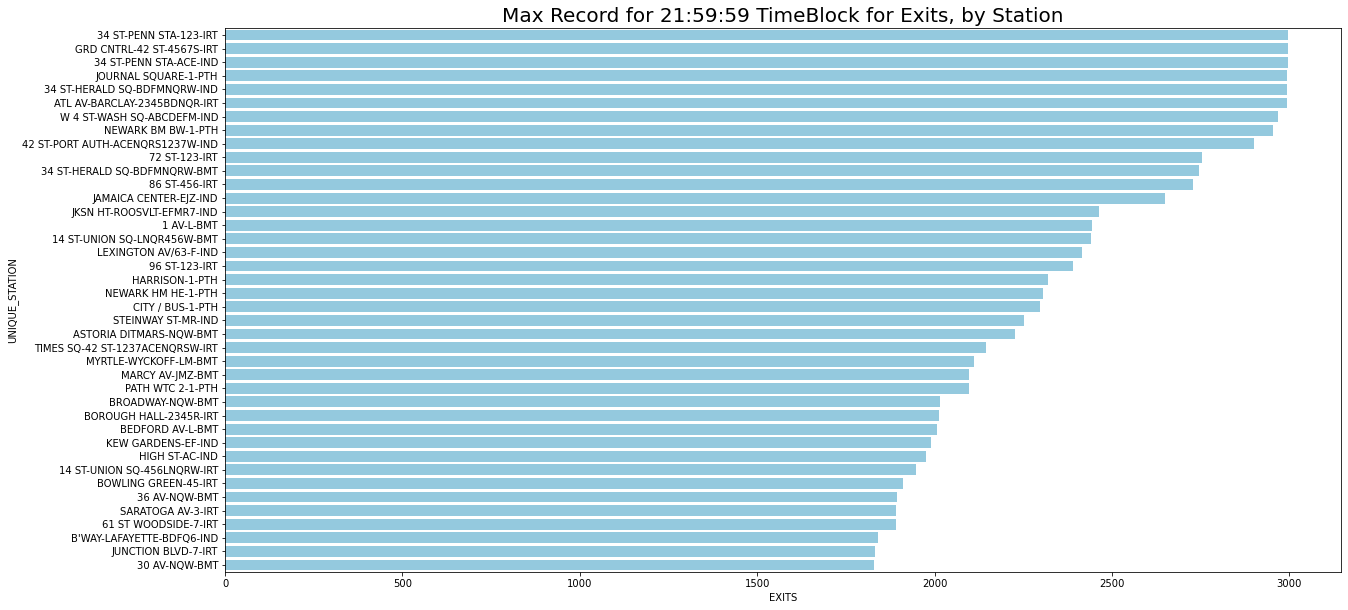

In [113]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='UNIQUE_STATION', x='EXITS', data=stationExitMax2[0:40], color='skyblue')
plt.title("Max Record for 21:59:59 TimeBlock for Exits, by Station", fontsize=20);

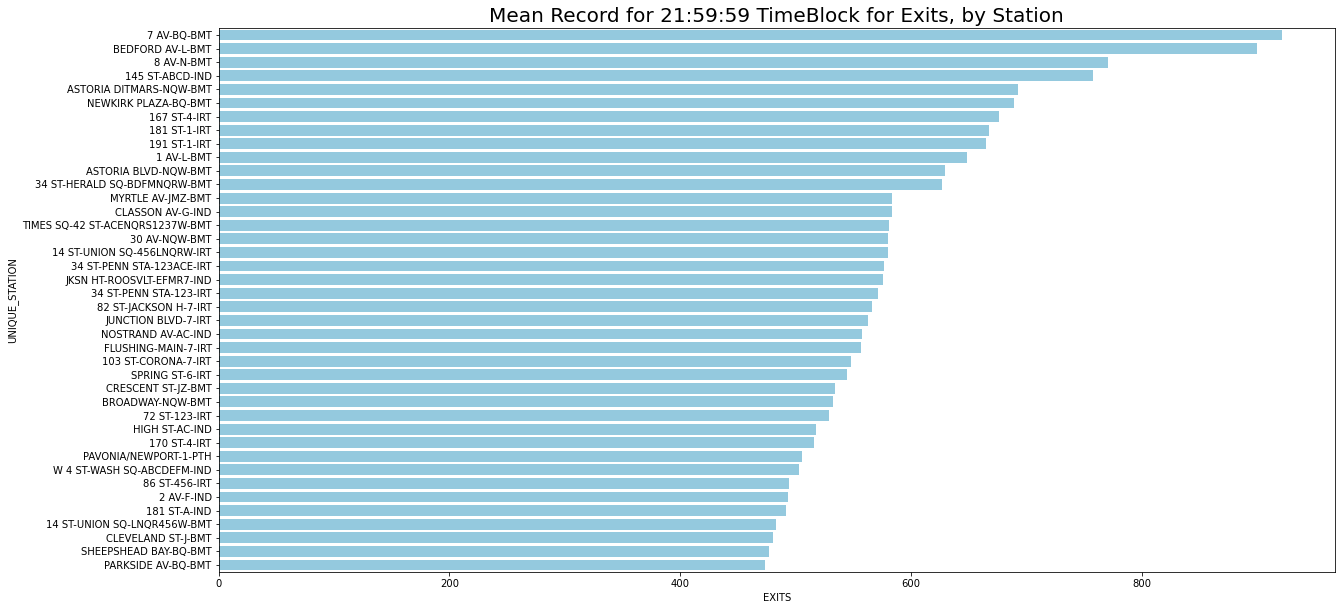

In [114]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='UNIQUE_STATION', x='EXITS', data=stationExitMean2[0:40], color='skyblue')
plt.title("Mean Record for 21:59:59 TimeBlock for Exits, by Station", fontsize=20);

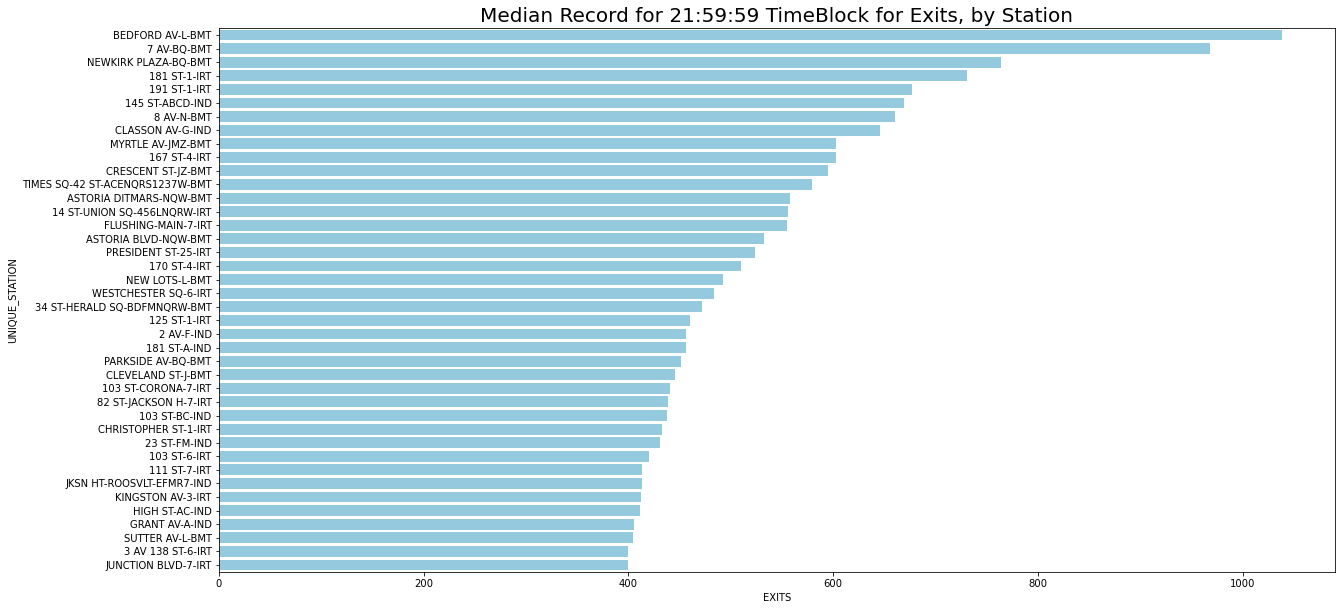

In [115]:
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='UNIQUE_STATION', x='EXITS', data=stationExitMedian2[0:40], color='skyblue')
plt.title("Median Record for 21:59:59 TimeBlock for Exits, by Station", fontsize=20);

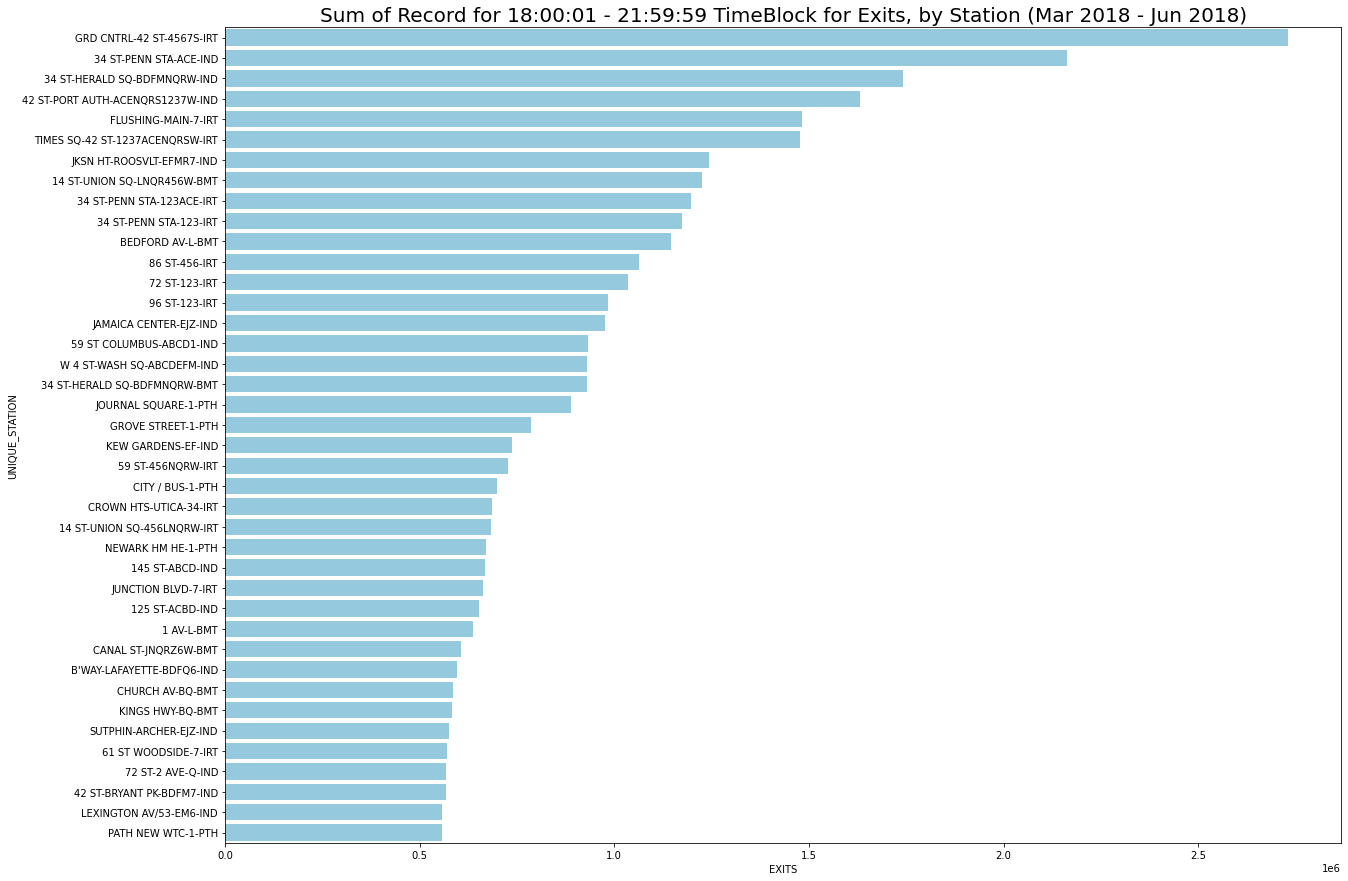

In [127]:
plt.figure(figsize=(20,15))
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(y='UNIQUE_STATION', x='EXITS', data=stationExitSum2[0:40], color='skyblue')
plt.title("Sum of Record for 18:00:01 - 21:59:59 TimeBlock for Exits, by Station (Mar 2018 - Jun 2018)", fontsize=20);

In [117]:
# getting information for the station lat and lon
#stationEntrances = pd.read_csv('https://data.ny.gov/api/views/i9wp-a4ja/rows.csv')
#stationEntrances

In [118]:
# creating a list of the station names
#stationNames = stationEntrances['Station Name']
#stationNames.values

In [119]:
# splitting the strings of station names by '-'
#stationNames = [ x.split('-') for x in stationNames ] 
#stationNames

In [120]:
# creating a function that will remove letters directly after a number. e.g. 2nd -> 2, 103rd -> 103, 18th -> 18
#def fixNums(x):
#    m = re.search(r'[0-9]*', x)
#    if m.group(0):
#        return m.group(0)
#    else:
#        return x.upper()

#def fixStr(x):
#    x = x.split()
#    x = [ fixNums(i) for i in x ]
#    return " ".join(x)

#def fixStationName(x):
#    x = [ fixStr(i) for i in x ]
#    return "-".join(x)

#fixStationName(['Bay Parkway', '22nd Av'])

In [121]:
# applying the function to the station names
#correctedStationNames = [ fixStationName(i) for i in stationNames]
#correctedStationNames

In [122]:
# replace the station names in the dataframe with the correct names
#stationEntrances['Station Name'] = correctedStationNames
#stationEntrances

In [123]:
# create a smaller dataframe with only the station name, lat, and lon
#stationLatLon = stationEntrances.groupby(['Station Name']).mean()[['Station Latitude','Station Longitude']].reset_index()
#stationLatLon.columns = ['STATION', 'LATITUDE', 'LONGITUDE']
#stationLatLon

In [124]:
# add the Station and Unique Station variables to the Lat and Lon dataframe
#tempDf = pd.DataFrame()
#tempDf['STATION'] = dataDf['STATION']
#tempDf['UNIQUE_STATION'] = dataDf['UNIQUE_STATION']

In [125]:
#stationName = dataDf['STATION'].values
#stationNameUnq = dataDf['UNIQUE_STATION'].values
#stationNameDict = { x: y for x, y in zip(stationNameUnq, stationName) }
#stationNameDict

In [126]:
# merge the lat and lon data with the working dataframe
#workingData225959 = workingData225959.merge(stationLatLon, how='left', on='UNIQUE_STATION')
#workingData225959
#workingData225959.merge(tempDf, how='left', on='UNIQUE_STATION')
#workingStations = workingData225959['UNIQUE_STATION'].values
#workingStations
#workingStationsUnq = [ stationNameDict[i] for i in  workingStations]
#workingStationsUnq
#workingData225959['STATION'] = workingStationsUnq
#workingData225959